In [1]:
# replace your read_csv with this codes
from hydra import initialize, compose, utils
from omegaconf import OmegaConf
import pandas as pd
import os

current_directory = os.getcwd()

with initialize(version_base=None, config_path="../../config/"):
    cfg = compose(config_name='main.yaml')
    print(f"Process data using {cfg.data.raw.hdb}")
    csv_file_path = os.path.join(current_directory, "../../", cfg.data.raw.hdb)
    df = pd.read_csv(csv_file_path)
    print(df.head())

Process data using data/raw/01_hdb_resale_transactions.csv
  block           street_name        town  postal_code    month flat_type  \
0   174   ANG MO KIO AVENUE 4  ANG MO KIO       560174  2015-01    3 ROOM   
1   541  ANG MO KIO AVENUE 10  ANG MO KIO       560541  2015-01    3 ROOM   
2   163   ANG MO KIO AVENUE 4  ANG MO KIO       560163  2015-01    3 ROOM   
3   446  ANG MO KIO AVENUE 10  ANG MO KIO       560446  2015-01    3 ROOM   
4   557  ANG MO KIO AVENUE 10  ANG MO KIO       560557  2015-01    3 ROOM   

  storey_range  floor_area_sqm      flat_model  lease_commence_date  \
0     07 TO 09            60.0        Improved                 1986   
1     01 TO 03            68.0  New Generation                 1981   
2     01 TO 03            69.0  New Generation                 1980   
3     01 TO 03            68.0  New Generation                 1979   
4     07 TO 09            68.0  New Generation                 1980   

   resale_price  latitude   longitude      cbd_dist

In [2]:
# initialize setup
from pycaret.regression import *
s = setup(df, 
          target = 'resale_price', 
           transform_target = True, 
           log_experiment = True, 
           experiment_name = 'hdb_1',
           train_size = 0.8,
           categorical_features = ['town', 'flat_type', 'storey_range', 'flat_model', 'month', 'lease_commence_date'],
           numeric_features = ['floor_area_sqm', 'cbd_dist', 'min_dist_mrt'],
           ignore_features = ['block', 'street_name', 'latitude', 'longitude'],
           remove_outliers = True,
           remove_multicollinearity = True,
           multicollinearity_threshold = 0.8,
           preprocess = True,
           transform_target_method = 'quantile',
           categorical_imputation = 'drop'
         )


,Description,Value
0,Session id,4431
1,Target,resale_price
2,Target type,Regression
3,Original data shape,"(194240, 15)"
4,Transformed data shape,"(186470, 51)"
5,Transformed train set shape,"(147622, 51)"
6,Transformed test set shape,"(38848, 51)"
7,Ignore features,4
8,Numeric features,3
9,Categorical features,6


In [3]:
best = compare_models(exclude = ['lar', 'lightgbm', 'ada', 'rf', 'lasso', 'et', 'catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,34657.5983,2527912997.2937,50270.1265,0.9050,0.0933,0.0704,11.1610
knn,K Neighbors Regressor,40347.9988,3401909760.0000,58295.5172,0.8720,0.1184,0.0862,5.5420
lr,Linear Regression,47190.5445,4228571021.9449,65024.2349,0.8410,0.1264,0.0975,6.5350
ridge,Ridge Regression,47189.3727,4228333671.6944,65022.4142,0.8410,0.1264,0.0975,1.5410
br,Bayesian Ridge,47189.8375,4228411763.8614,65023.0142,0.8410,0.1264,0.0975,1.6320
omp,Orthogonal Matching Pursuit,57975.0362,6468497786.1081,80422.4339,0.7568,0.1527,0.1182,1.2030
dt,Decision Tree Regressor,65225.4725,7467988304.9966,86405.1111,0.7192,0.1760,0.1417,1.7300
en,Elastic Net,68111.5401,8445675824.3155,91894.1996,0.6825,0.1761,0.1405,1.3390
llar,Lasso Least Angle Regression,69096.0952,8742311024.1561,93494.0624,0.6713,0.1779,0.1421,1.2490
huber,Huber Regressor,89022.6800,14554964388.8243,120637.4154,0.4528,0.2301,0.1824,2.8770


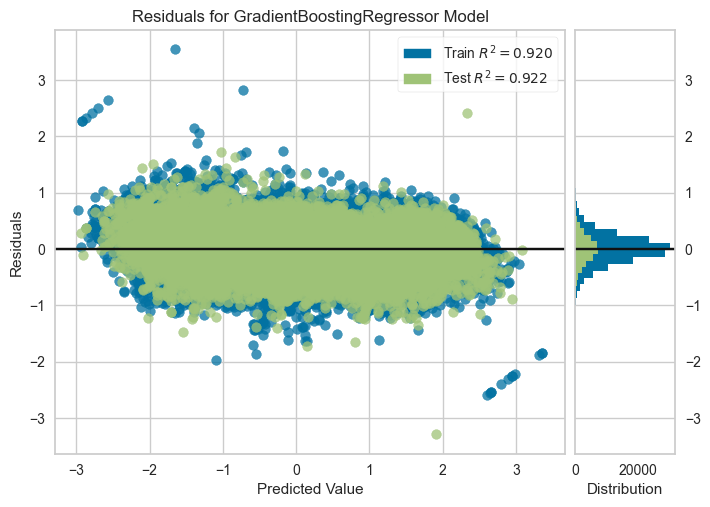

In [4]:
plot_model(best, plot = 'residuals')

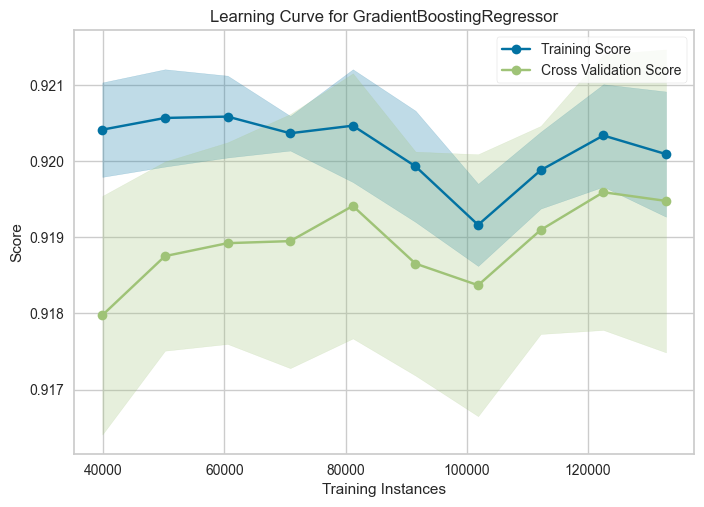

In [5]:
plot_model(best, plot = 'learning')

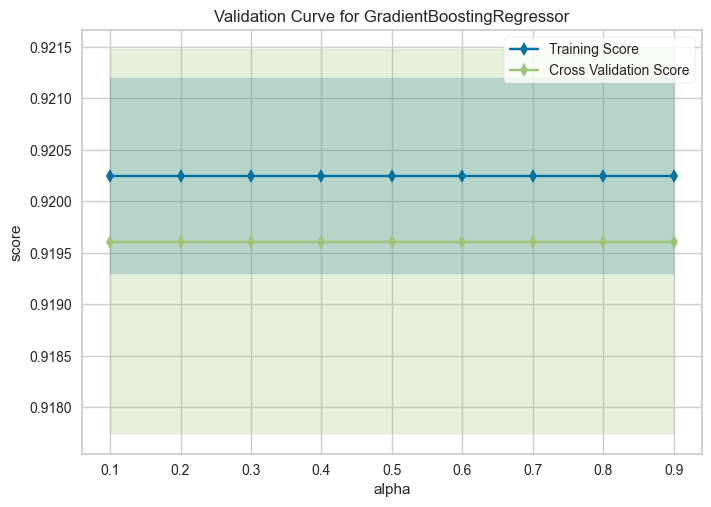

In [6]:
plot_model(best, plot = 'vc')

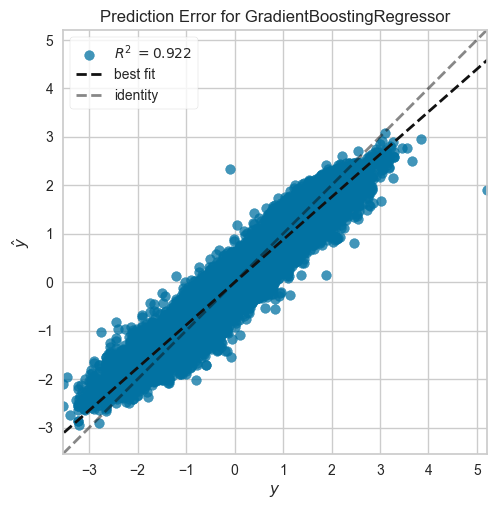

In [7]:
plot_model(best, plot = 'error')

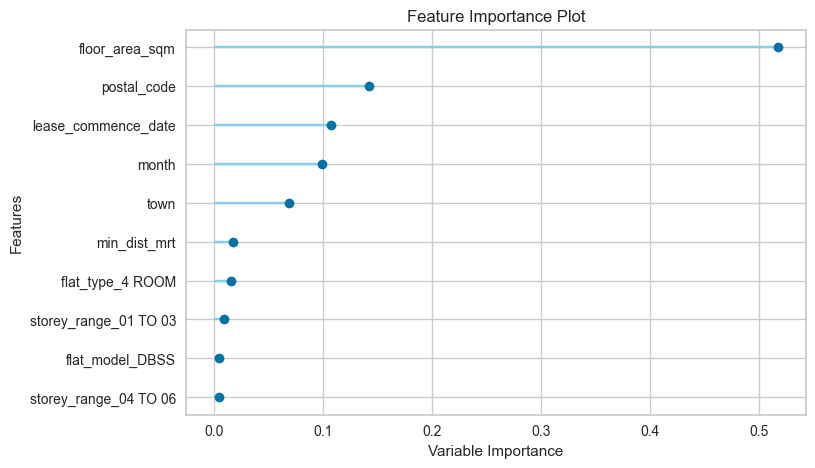

In [8]:
plot_model(best, plot = 'feature')

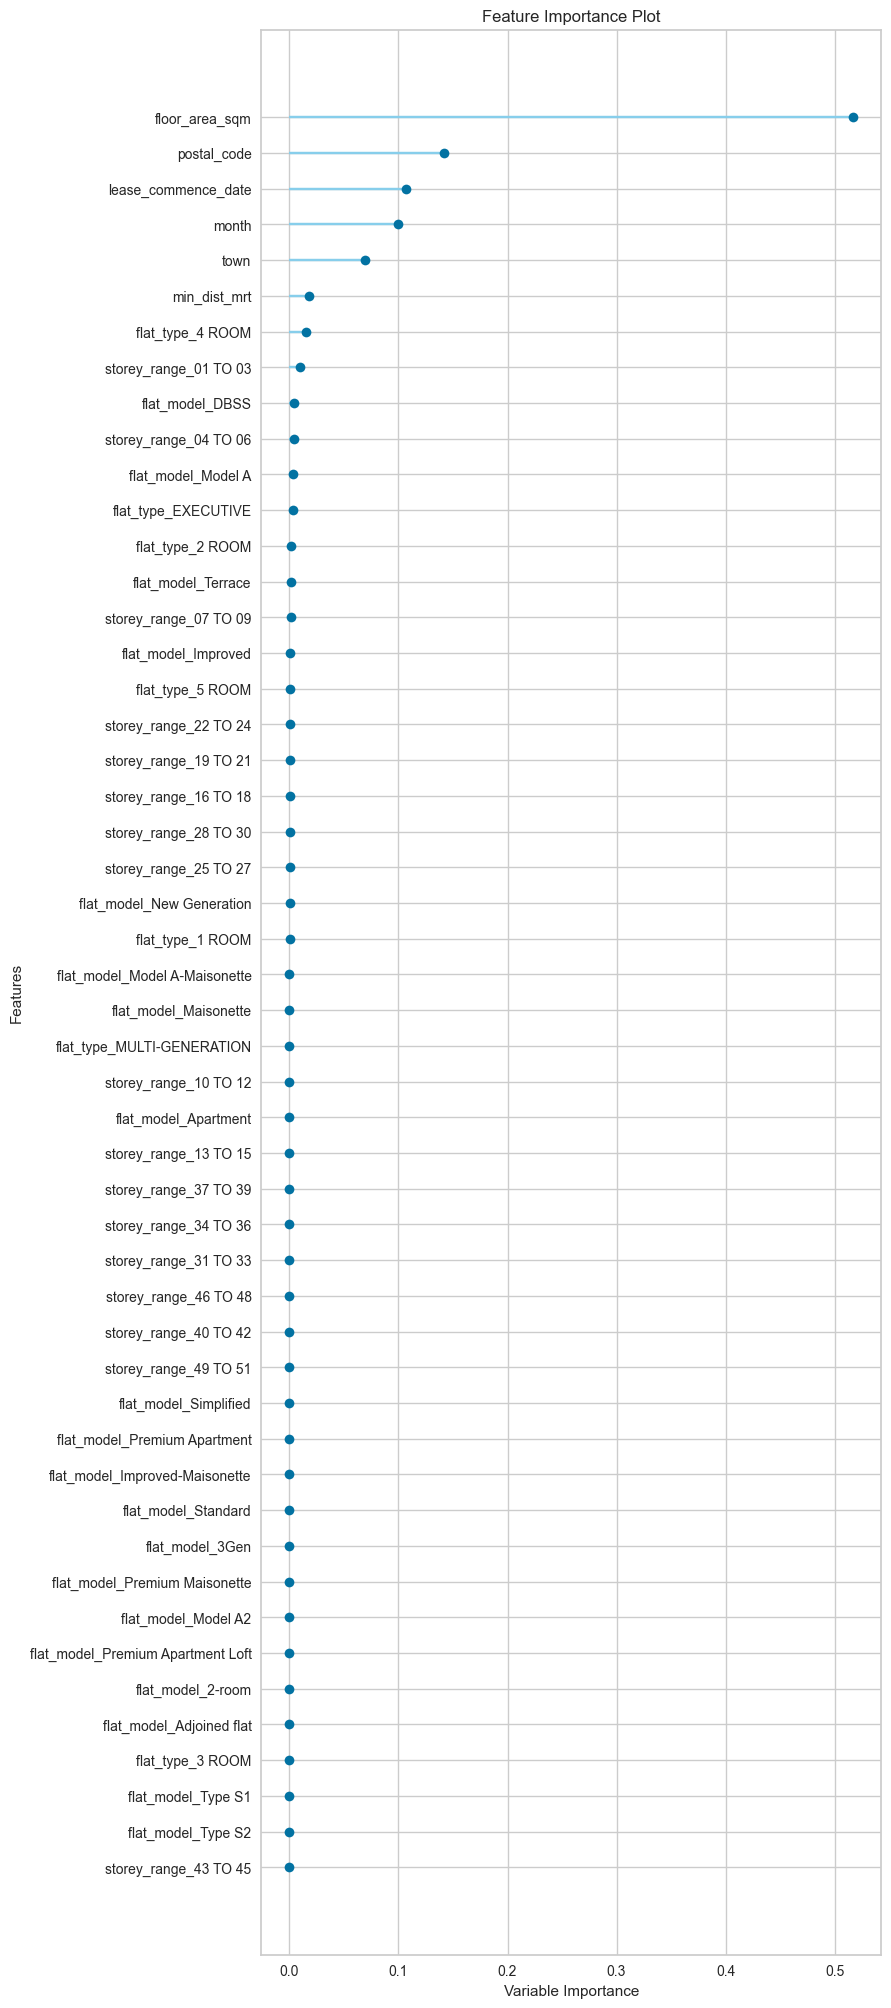

In [9]:
plot_model(best, plot = 'feature_all')

In [10]:
df = df.drop(['block', 'street_name', 'latitude', 'longitude'], axis=1)

In [11]:
df[["Year", "Month"]] = df['month'].str.split("-", expand=True)

In [12]:
df = df.drop(['month'], axis=1)

In [13]:
from pycaret.regression import *
s = setup(df, 
          target = 'resale_price', 
          transform_target = True,
          log_experiment = True, 
          experiment_name = 'hdb_1',
          train_size = 0.8,
          categorical_features = ['town','postal_code', 'Year', 'Month', 'flat_type', 'storey_range', 'flat_model', 'lease_commence_date'],
          numeric_features = ['floor_area_sqm', 'cbd_dist', 'min_dist_mrt'],
          remove_outliers = True,
          remove_multicollinearity = True,
          multicollinearity_threshold = 0.8,
          transform_target_method = 'quantile',
          preprocess = True,
          categorical_imputation = 'drop',
         )

,Description,Value
0,Session id,2668
1,Target,resale_price
2,Target type,Regression
3,Original data shape,"(194240, 12)"
4,Transformed data shape,"(186470, 71)"
5,Transformed train set shape,"(147622, 71)"
6,Transformed test set shape,"(38848, 71)"
7,Numeric features,3
8,Categorical features,8
9,Preprocess,True


In [14]:
best = compare_models(exclude = ['lar', 'lightgbm', 'ada', 'rf', 'lasso', 'et', 'catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,35796.8845,2611914695.4553,51100.6351,0.9013,0.0960,0.0732,10.6170
knn,K Neighbors Regressor,41296.4758,3280788659.2000,57276.0512,0.8761,0.1179,0.0884,5.7770
lr,Linear Regression,46927.7130,4189835172.6126,64727.0370,0.8417,0.1257,0.0969,7.2450
ridge,Ridge Regression,46927.5599,4189746816.3392,64726.3629,0.8417,0.1257,0.0969,1.4980
br,Bayesian Ridge,46927.6046,4189754684.0407,64726.4220,0.8417,0.1257,0.0969,2.0590
omp,Orthogonal Matching Pursuit,58338.1906,6476503059.1725,80474.6414,0.7553,0.1535,0.1194,1.3330
dt,Decision Tree Regressor,67234.1588,8202902747.9159,90557.1486,0.6901,0.1812,0.1442,1.7060
en,Elastic Net,68206.9616,8409424514.0921,91700.4178,0.6823,0.1763,0.1411,1.4520
llar,Lasso Least Angle Regression,69093.0785,8677525206.6176,93150.7291,0.6722,0.1778,0.1426,1.3110
huber,Huber Regressor,86022.4291,13680523371.1972,116770.9245,0.4832,0.2221,0.1764,3.4190


In [15]:
gb = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,36570.3062,2719339692.4825,52147.2884,0.8983,0.0980,0.0746
1,36069.0280,2642899744.5435,51409.1407,0.8997,0.0969,0.0739
2,36171.9491,2663116914.0918,51605.3962,0.8986,0.0968,0.0738
3,35128.1407,2486884929.9177,49868.6768,0.9061,0.0945,0.0720
4,35028.6770,2526699774.0964,50266.2886,0.9051,0.0946,0.0717
5,36272.8095,2682576116.1515,51793.5915,0.9000,0.0969,0.0740
6,35103.2061,2472876471.0726,49728.0250,0.9051,0.0938,0.0719
7,35843.2562,2652506980.8594,51502.4949,0.9005,0.0959,0.0732
8,35863.6142,2658572736.9507,51561.3493,0.9007,0.0963,0.0734


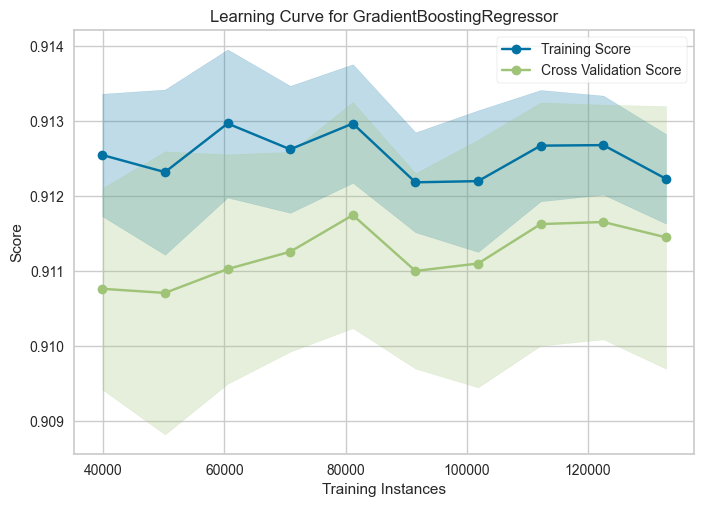

In [16]:
plot_model(best, plot = 'learning')

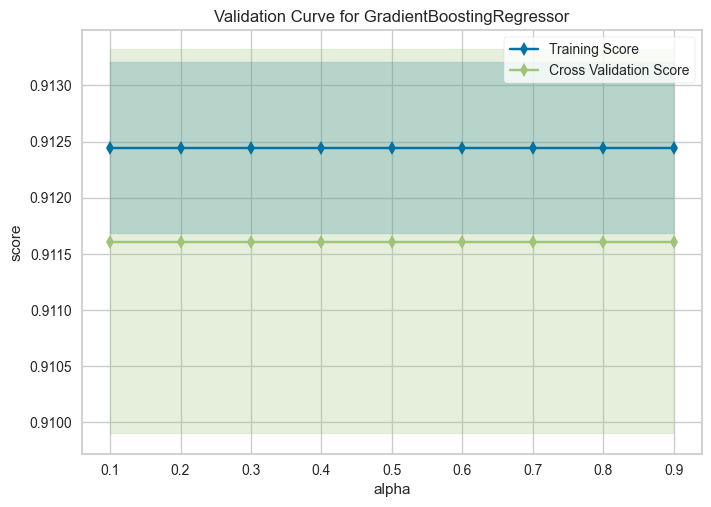

In [17]:
plot_model(best, plot = 'vc')

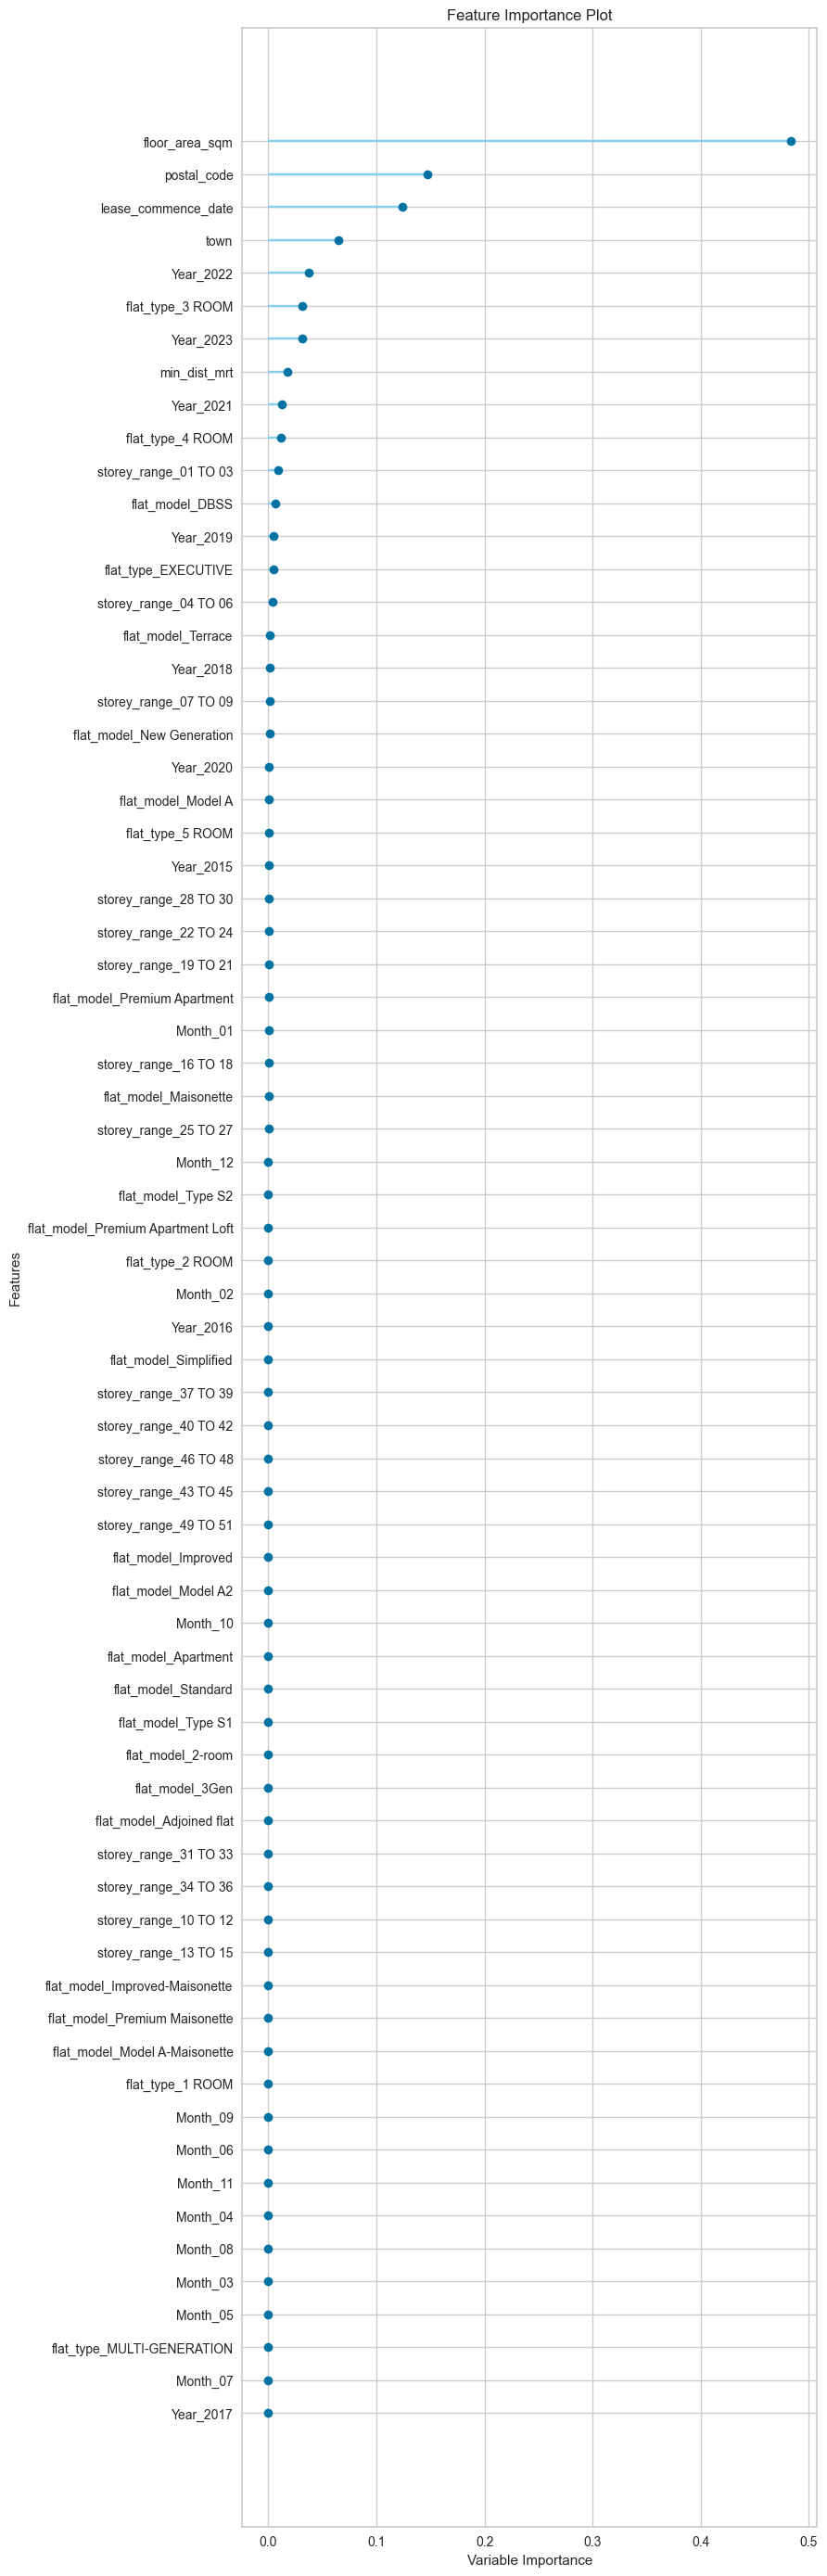

In [18]:
plot_model(best, plot = 'feature_all')

In [19]:
# finalize the model
final_best = finalize_model(gb)

# save model to disk
save_model(final_best, 'gb')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Akira\AppData\Local\Temp\joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=QuantileTransformer(output_distribution='normal',
                                                                                                            random_state=2668)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['floor_area_sqm', 'cbd_dist',
                                              'min_dist_mrt'],
                                     transf...
                                     transformer=LeaveOneOutEncoder(cols=['town'],
                                                                    handle_missing='return_nan',
                                                                    random_state=2668))),
                 ('remove_multicollinearity',
                  TransformerWrapper(exclude=[],
                  